# Ex 1

In [1]:
import numpy as np


def get_rot_matrix(alpha):
    al = np.deg2rad(alpha)
    rot = np.array([[np.cos(al), -np.sin(al)], 
                    [np.sin(al), np.cos(al)]])
    return rot

In [2]:
get_rot_matrix(alpha=-45)

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [3]:
get_rot_matrix(alpha=30)

array([[ 0.8660254, -0.5      ],
       [ 0.5      ,  0.8660254]])

## check

In [4]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


def plot_polygons(p_inp, p_out, x_lim, y_lim):
    fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    ax1.add_patch(p_inp)
    ax1.set_xlim(x_lim)
    ax1.set_ylim(y_lim)
    ax2.add_patch(p_out)
    ax2.set_xlim(x_lim)
    ax2.set_ylim(y_lim)
    ax1.grid()
    ax2.grid()
    plt.show()

In [5]:
obj_input = np.array([[1, 0], [1, 2], [3, 2], [3, 0]])

rot_30 = get_rot_matrix(alpha=45)
obj_out = rot_30.dot(obj_input.T).T

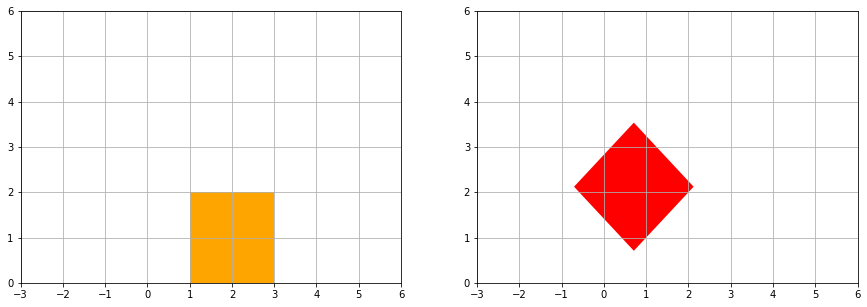

In [6]:
p_inp = Polygon(obj_input, facecolor = 'orange')
p_out = Polygon(obj_out, facecolor = 'red')

plot_polygons(p_inp, p_out, (-3, 6), (0, 6))

# Ex 2

In [7]:
def rot_around_vec(data, alpha, vec):
    rot_m = get_rot_matrix(alpha)
    rot_m_vec = np.array([[rot_m[0][0], rot_m[0][1], vec[0]],
                         [rot_m[1][0], rot_m[1][1], vec[1]], 
                         [0, 0, 1]])
    minus_vec = np.array([[1, 0, -vec[0]],
                         [0, 1, -vec[1]], 
                         [0, 0, 1]])
    rt_matrix = rot_m_vec.dot(minus_vec)
    return rt_matrix

## a

In [8]:
c = np.array([2, 3])
alpha = -90

In [9]:
obj_input = np.array([[2, 3, 1], [1, 2, 1], [4, 2, 1]])
rt_matrix = rot_around_vec(obj_input, alpha, c)
obj_out = rt_matrix.dot(obj_input.T).T

rt_matrix

array([[ 6.123234e-17,  1.000000e+00, -1.000000e+00],
       [-1.000000e+00,  6.123234e-17,  5.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  1.000000e+00]])

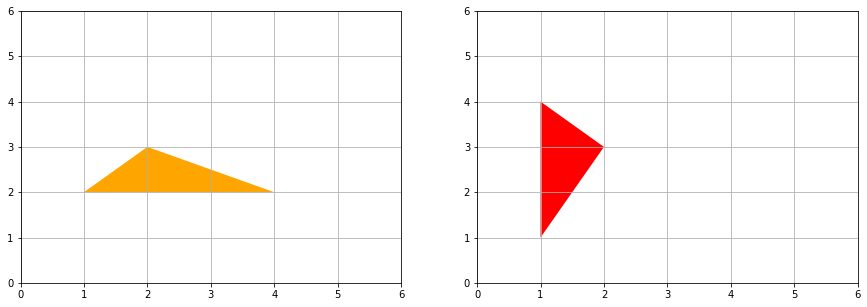

In [10]:
p_inp = Polygon(np.delete(obj_input, 2, 1), facecolor = 'orange')
p_out = Polygon(np.delete(obj_out, 2, 1), facecolor = 'red')
plot_polygons(p_inp, p_out, (0, 6), (0, 6))

## b

In [11]:
c = np.array([-1, 4])
alpha = 45

In [12]:
obj_input = np.array([[2, 3, 1], [1, 2, 1], [4, 2, 1]])
rt_matrix = rot_around_vec(obj_input, alpha, c)
obj_out = rt_matrix.dot(obj_input.T).T

rt_matrix

array([[ 0.70710678, -0.70710678,  2.53553391],
       [ 0.70710678,  0.70710678,  1.87867966],
       [ 0.        ,  0.        ,  1.        ]])

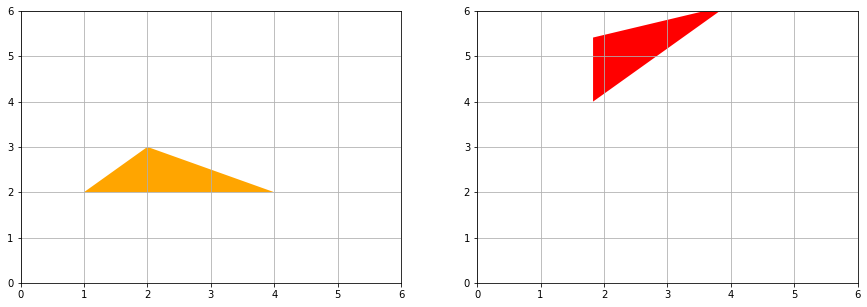

In [13]:
p_inp = Polygon(np.delete(obj_input, 2, 1), facecolor = 'orange')
p_out = Polygon(np.delete(obj_out, 2, 1), facecolor = 'red')
plot_polygons(p_inp, p_out, (0, 6), (0, 6))

# Ex 3

In [14]:
def get_flip_matrix(axis):
    return np.array([[-1 if axis==0 else 1, 0],
                  [0, -1 if axis==1 else 1]])
    
    
def flip_around_vec(data, axis, v0):
    flip_m = get_flip_matrix(axis=axis)
    flip_m_vec = np.array([[flip_m[0][0], flip_m[0][1], v0 if not axis else 0],
                          [flip_m[1][0], flip_m[1][1], v0 if axis else 0], 
                          [0, 0, 1]])
    minus_vec = np.array([[1, 0, -v0 if not axis else 0],
                         [0, 1, -v0 if axis else 0], 
                         [0, 0, 1]])
    flip_matrix = flip_m_vec.dot(minus_vec)
    return flip_matrix

In [15]:
x0 = 4

In [16]:
obj_input = np.array([[1, 3, 1], [1, 2, 1], [4, 2, 1]])
rt_matrix = flip_around_vec(obj_input, axis=0, v0=x0)
obj_out = rt_matrix.dot(obj_input.T).T

rt_matrix

array([[-1,  0,  8],
       [ 0,  1,  0],
       [ 0,  0,  1]])

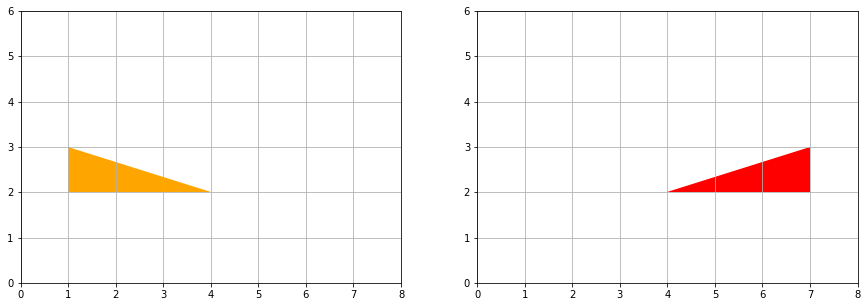

In [17]:
p_inp = Polygon(np.delete(obj_input, 2, 1), facecolor = 'orange')
p_out = Polygon(np.delete(obj_out, 2, 1), facecolor = 'red')
plot_polygons(p_inp, p_out, (0, 8), (0, 6))